#### dataset https://archive.ics.uci.edu/ml/datasets/iris

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

dataset = pd.read_csv('data/Iris.csv')

In [4]:
x = dataset.iloc[:, [1,2,3,4]].values

In [7]:
kmeans = KMeans(n_clusters = 3, init='k-means++',max_iter=300,n_init=10, random_state=0)

In [8]:
y_kmeans = kmeans.fit_predict(x)

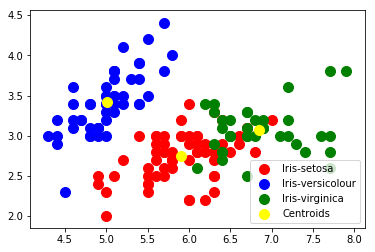

In [11]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

/home/harry/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


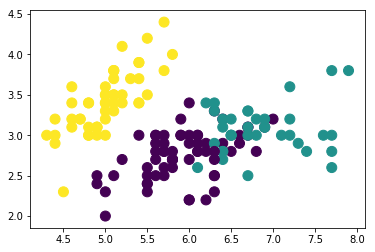

In [17]:
from sklearn.cluster import SpectralClustering

model = SpectralClustering(n_clusters=3, affinity='nearest_neighbors',assign_labels='kmeans')

labelsS = model.fit_predict(x)
#fig, ax = plt.subplots(figsize=(9,7))
ax.set_title('Built in sklearn spectral clustering', fontsize=18, fontweight='demi')
plt.scatter(x[:, 0], x[:, 1], c=labelsS, s=100)